In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

## manipulating the given dataset

In [3]:
bank_data = pd.read_csv('application_data.csv')
bank_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
bank_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

#### counting all missing values in columns


In [11]:
# Count missing values column wise
bank_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
C

In [12]:
# List of all columns having missing values greater than 30% of their size
bankdata_colm30 = (bank_data.columns[(round(100*(bank_data.isnull().sum()/len(bank_data.index)), 2)) >= 30]).tolist()
bankdata_colm30

[]

In [13]:
# now we shall delete all the above listed columns as they provide little to no analysing potential
bank_data = bank_data.drop(bankdata_colm30,axis=1)

In [14]:
bank_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

###### we can see that the columns that showed values less than 30% are no longer part of our case study

##### removing the columns that are not much relevant for the analysis

In [15]:
cols_irrelevant = ['DAYS_REGISTRATION','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                   'FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION',
                   'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE',
                  'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
                  'NAME_TYPE_SUITE']
cols_irrelevant
#all the above columns have been listed by hand after determing the information provided by them is not particularly relevant for analysis

['DAYS_REGISTRATION',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE']

In [16]:
# Delete the columns which are irrelevant for the analysis
bank_data = bank_data.drop(cols_irrelevant,axis=1)

In [17]:
bank_data.shape

(307511, 53)

In [18]:
bank_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCU

#### manipulating Missing Values in Rows

In [19]:
# when we count the number of rows having more than 50% missing values we find the answer to be zero
len(bank_data[bank_data.isnull().sum(axis=1) > (len(bank_data.columns)//2)].index)

0

In [20]:
# Percent of missing values in columns
(round(100*(bank_data.isnull().sum()/len(bank_data.index)),2))

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_ID_PUBLISH                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
ORGANIZATION_TYPE               0.00
EXT_SOURCE_2                    0.21
EXT_SOURCE_3                   19.83
F

##### there are several columns that have missing values, we will be manipulating each of them one after the other

In [21]:
# due to the name given, it can be assumed that EXT_SOURCE_2 and EXT_SOURCE_3 have similar information albiet in different columns, we'll be taking the average of the two
# number of rows for which both EXT_SOURCE_2 and EXT_SOURCE_3 are empty
len(bank_data[np.isnan(bank_data['EXT_SOURCE_2']) & np.isnan(bank_data['EXT_SOURCE_3'])])

230

In [22]:
# since 230 is a small number considering the size of the data, we can simply delete these records
bank_data = bank_data[(~(np.isnan(bank_data['EXT_SOURCE_2']) & np.isnan(bank_data['EXT_SOURCE_3'])))]

In [23]:
# lets make a comparision between EXT_SOURCE_2 and EXT_SOURCE_3
round(bank_data.loc[:, ['EXT_SOURCE_2', 'EXT_SOURCE_3']].describe(),3)

,EXT_SOURCE_2,EXT_SOURCE_3
count,306851.000,246546.000
mean,0.514,0.511
std,0.191,0.195
min,0.000,0.001
25%,0.392,0.371
50%,0.566,0.535
75%,0.664,0.669
max,0.855,0.896


###### the difference between the mean and mode is negligible; so is the variance between 25th anf the 75th percentile
###### Therefore imputing the missing values by the mean value of `EXT_SOURCE_2` and `EXT_SOURCE_3` respectively.

In [24]:
# we will now impute EXT_SOURCE_2 and EXT_SOURCE_3 by mean values
bank_data.loc[np.isnan(bank_data['EXT_SOURCE_2']), ['EXT_SOURCE_2']] = bank_data['EXT_SOURCE_2'].mean()
bank_data.loc[np.isnan(bank_data['EXT_SOURCE_3']), ['EXT_SOURCE_3']] = bank_data['EXT_SOURCE_3'].mean()


In [25]:
(round(100*(bank_data.isnull().sum()/len(bank_data.index)),2))
# as we can see, the null value percentage is now at 0.00 for 'EXT_SOURCE_2' and 'EXT_SOURCE_3'

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_ID_PUBLISH                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
ORGANIZATION_TYPE               0.00
EXT_SOURCE_2                    0.00
EXT_SOURCE_3                    0.00
F

In [26]:
# now we will treat the missing values in AMT_GOODS_PRICE
bank_data['AMT_GOODS_PRICE'].describe().apply(lambda x: '%.2f' % x)

count     307004.00
mean      538484.20
std       369486.08
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: object

<AxesSubplot:>

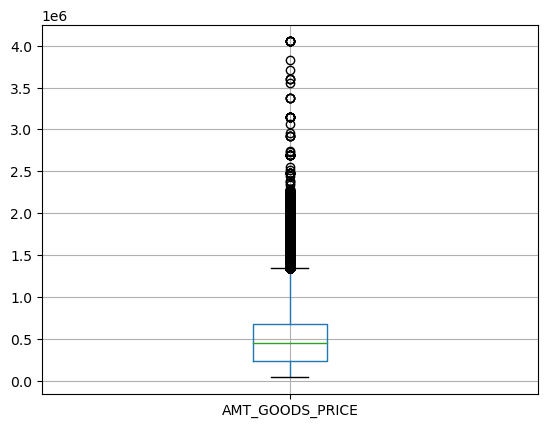

In [27]:
bank_data.boxplot(column =['AMT_GOODS_PRICE']) 

The standard deviation of `AMT_GOODS_PRICE` is very high. we can also see that there are a good number of outliers as well.
if we impute the missing values with mean or median for this column will make the data biased.
the best course of action is to remove the rows with missing values in `AMT_GOODS_PRICE`.

In [28]:
bank_data = bank_data[~np.isnan(bank_data['AMT_GOODS_PRICE'])]

there are a total of 5 colums dedicated to the number of enquiries made to the Credit Bureau.
counting the enquiry over a very short period of time such as an hour or a day or a week before the application date for a very long period of time makes little to no sense as in case of the former, the client may simply be looking at various options they have and in case of the latter, the financial situation could have changed considerably. 
therefore, we will only be consider the column with the quarter range inquiries. 

We will now delete the columns for the count of hour, day, week, month and year and We will handle missing data for the column `AMT_REQ_CREDIT_BUREAU_QRT`


In [29]:
# Handling AMT_REQ_CREDIT_BUREAU_QRT 
bank_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265662.000000
mean          0.265552
std           0.794315
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

This is an integer type variable, and thus have values 0, 1, 2 etc. We cannot impute the NaNs by the mean or the median (1.53 enquires does not make sense!).
Thus, we need to impute them by the mode - the most common occurring value if that approach is feasible.

In [30]:
# converting AMT_REQ_CREDIT_BUREAU_QRT to type 'category'
df_application_current['AMT_REQ_CREDIT_BUREAU_QRT'] = df_application_current['AMT_REQ_CREDIT_BUREAU_QRT'].astype('category')

# displaying frequencies of each category
df_application_current['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

NameError: name 'df_application_current' is not defined

The most common value of ```AMT_REQ_CREDIT_BUREAU_QRT``` is 0, so let's impute the NaNs by that.

In [ ]:
# Imputing AMT_REQ_CREDIT_BUREAU_QRT with 0
bank_data.loc[pd.isnull(bank_data['AMT_REQ_CREDIT_BUREAU_QRT']), ['AMT_REQ_CREDIT_BUREAU_QRT']] = 0

In [ ]:
# Deleting AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_YEAR
bank_data = bank_data.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1)

In [ ]:
(round(100*(bank_data.isnull().sum()/len(bank_data.index)),2))

our dataframe does not have any missing values anymore. comparing our current data with what we had at the begining: `307511` rows.


In [ ]:
bank_data.shape

In [ ]:
# Percentage of lost rows
(100 - 100*(len(bank_data.index)/307511))

## only 0.16% rows were lost in the entire data cleaning process

#### We shall now convert the  `DAYS_BIRTH` column into `AGE` column for better analysis, since it is easier and conventional to analyse data in years rather than days

In [ ]:
# Dividing 'DAYS_BIRTH' by 365 for Age in years
bank_data['AGE'] = abs(bank_data['DAYS_BIRTH']//365)


In [ ]:
# we will now delete the 'DAYS_BIRTH' column as we have a better 'AGE' column
bank_data = bank_data.drop(['DAYS_BIRTH'],axis=1)

#### now we will convert the `DAYS_EMPLOYED` column into `YEARS_EMPLOYED` column for  analysis

In [ ]:
# Divide 'DAYS_EMPLOYED' by 365 for YEAR_EMPLOYED
bank_data['YEARS_EMPLOYED'] = abs(bank_data['DAYS_EMPLOYED']//365)

In [ ]:
# we will now delete the 'DAYS_EMPLOYED' column
bank_data = bank_data.drop(['DAYS_EMPLOYED'],axis=1)

In [ ]:
bank_data.head()

In [ ]:
# we can see the updated columns and the changes we made in the above latest dataframe

### outliers

In [ ]:
# we will find the outliers in all the numerical columns with 1.5 IQR rule and remove them throughly 
outlier = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE']
for colm in outlier: 
    q1 = bank_data[colm].quantile(0.25)
    q3 = bank_data[colm].quantile(0.75)
    iqr = q3-q1
    low_range  = q1-1.5*iqr
    high_range = q3+1.5*iqr
    bank_data = bank_data.loc[(bank_data[colm] > low_range) & (bank_data[colm] < high_range)]

bank_data.shape

In [ ]:
# the latest percent of rows lost
round((100 - 100*(len(bank_data.index)/307511)),2)

although we lost `10.25%` of rows, we were able to get rid of the outliers ensuring a more accurate analysis of data  

### Data Imbalance

In [ ]:
# we will now check for any imbalances in the data by ploting different columns
columns_list = ['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE',
            'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
k=0
plt.figure(figsize=(20,15))
for colm in columns_list:    
    k=k+1
    plt.subplot(3, 3,k)    
    bank_data[colm].value_counts().plot(kind='bar');
    plt.title(colm)

plt.show()

There is a significant data imbalance in the below columns:-
1. TARGET -  very few defaulters(1) compared to non defaulters(0)
2. NAME_CONTRACT_TYPE - very few Revolving loans compared to Cash loans
3. NAME_EDUCATION_TYPE - secondary/Secondary special educated people dominate data
4. NAME_FAMILY_STATUS - married people dominate data.
5. NAME_HOUSING_TYPE - home or appartment owners dominate data


In [ ]:
# Plotting all the FLAG_DOCUMENT columns to check data imbalance
k=0
plt.figure(figsize=(15,15))
for i in range(2,22) :    
    k=k+1
    plt.subplot(5, 5,k)    
    colm_name = 'FLAG_DOCUMENT_'+str(i)
    bank_data[colm_name].value_counts().plot(kind='bar');
    plt.title(colm_name)
plt.show()


we can removie all the FLAG_DOCUMENT columns except FLAG_DOCUMENT_3 since they all have a negligible count of 1

In [ ]:
# deleting all the FLAG_DOCUMENT columns except FLAG_DOCUMENT_3
bank_data.drop('FLAG_DOCUMENT_2',axis=1,inplace=True)
for i in range(4,22):
    col = 'FLAG_DOCUMENT_'+str(i)
    bank_data.drop(col,axis=1,inplace=True)

#### Binning `AGE`,  `AMT_INCOME_TOTAL`, `AMT_CREDIT` and `EXT_SOURCE_SCORE` columns

#### Creating three age groups - young adult, adult and retired adult

In [ ]:
bank_data['AGE'].describe()

In [ ]:
# function to categorize AGE_GROUP (young adult, adult and retired adult)
def age_group(a):
    if (a < 40):
        return 'young adult'
    elif (a >= 40 and a < 60):
        return 'adult'
    else:
        return 'retired adult'

In [ ]:
#Creating new column AGE_GROUP
bank_data['AGE_GROUP'] = bank_data['AGE'].apply(age_group)
bank_data.head()

#### Creating three credit amount groups - High, medium and low

In [ ]:
round(bank_data['AMT_CREDIT'].describe(),2)

In [ ]:
# function to categorizie CREDIT_GROUP (High, Medium and Low)
def credit_group(c):
    if (c < 500000):
        return 'Low'
    elif (c >= 500000 and c < 750000):
        return 'Medium'
    else:
        return 'High'

In [ ]:
#we will now create a new column 'CREDIT_GROUP'
bank_data['CREDIT_GROUP'] = bank_data['AMT_CREDIT'].apply(credit_group)
bank_data.head()

#### Creating three income groups - Hign, medium and Low

In [ ]:
bank_data['AMT_INCOME_TOTAL'].describe()

In [ ]:
# function to categorize AMT_INCOME_TOTAL (Low, Medium and High)
def income_group(i):
    if (i < 100000):
        return 'Low'
    elif(i >= 100000 and i < 150000):
        return 'Medium'
    else:
        return 'High'

In [ ]:
# Creating column INCOME_GROUP with AMT_INCOME_TOTAL (Low, Medium and High)
bank_data['INCOME_GROUP'] = bank_data['AMT_INCOME_TOTAL'].apply(income_group)
bank_data.head()

we will now take average of two different external data sources (EXT_SOURCE_2 and EXT_SOURCE_3) and creating a column called EXT_SOURCE_SCORE to simplify analysis


In [ ]:
bank_data['EXT_SOURCE_SCORE'] = round(((bank_data['EXT_SOURCE_2'] + bank_data['EXT_SOURCE_3'])/2),2)
bank_data.head()

In [ ]:
# deleting EXT_SOURCE_2 and EXT_SOURCE_3
bank_data.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1,inplace=True)

#### Creating three External source score groups - High, Medium and Low

In [ ]:
bank_data['EXT_SOURCE_SCORE'].describe()

In [ ]:
# Define function for categorizing EXT_SOURCE_SCORE (Low, Medium and High)
def ext_source_group(e):
    if (e < 0.4):
        return 'Low'
    elif (e >= 0.4 and e < 0.6):
        return 'Medium'
    else:
        return 'High'

In [ ]:
# Creating column EXT_SCORE_CATEGORY with High, medium and Low
bank_data['EXT_SCORE_CATEGORY'] = bank_data['EXT_SOURCE_SCORE'].apply(ext_source_group)
bank_data.head()

In [ ]:
# Remove rows where CODE_GENDER == XNA
# There are four such rows
bank_data = bank_data[~(bank_data['CODE_GENDER'] == 'XNA')]

### Divide data into two sets 
##### Client with payment difficulties (Target=1) 
##### All other cases (Target=0) 

In [ ]:
# Client with payment difficulties (Target=1)
target1 = bank_data[bank_data['TARGET'] == 1]
target1.head()

In [ ]:
# Client with all other cases (Target=0)
target0 = bank_data[bank_data['TARGET'] == 0]
target0.head()

In [ ]:
target0.shape

In [ ]:
target1.shape

## Analysis

### Univariate analysis for Unordered categorical variables

#### Count of defaulters and non-defaulters on the basis of gender

In [ ]:
#plots for defaulters and non defaulters on gender basis
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
ax = sns.countplot(x = 'CODE_GENDER',data=target1)
plt.title('Defaulters')
ax.set(xlabel='Gender')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CODE_GENDER',data=target0)
plt.title('Non-Defaulters')
ax.set(xlabel='Gender')

plt.show()

##### Analysis
1. **Defaluters** - females are slightly more in number than males.
2. **Non-defaluters** - females are more in number here than males here as well but comparitively, the difference is much higher in the non defaulters category.

####  On the basis of Loan type

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=target1)
plt.title('Defaulters')
ax.set(xlabel='Loan type')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=target0)
plt.title('Non-Defaulters')
ax.set(xlabel='Loan type')

plt.show()

##### Analysis
both cases show that Revolving loans are very less compared to Cash loans.

#### Defaulters and non-defaulters on the basis of Income type

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=target1)
plt.title('Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=target0)
plt.title('Non-Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.show()

#### Analysis
1. **Defaulters** - Working class clients are most defaulted category since their numbers are high compared to other pfrofessions.
2. **Non-defaulters** - same analysis as above.

#### Defaulters and non-defaulters on the basis of Education type

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=target1)
plt.title('Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=target0)
plt.title('Non-Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.show()

##### Analysis
1. **Defaulters** - clients with education under Secondary/Secondary sepcial are comaparitively more in relation with other level of eduacted poeple.
2. **Non defaulters** - similar analysis as above

#### Defaulters and non-defaulters on the basis of Family status

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=target1)
plt.title('Defaulters')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=target0)
plt.title('Non-Defaulters')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.show()

##### Analysis
For both the categories (defaulters and non-defaulters) married people are more comapred to single, separated, widow etc.

### Univariate analysis for continious variables

#### Defaulters and non-defaulters on the basis of credit amount of the loan

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(target1['AMT_CREDIT'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(target0['AMT_CREDIT'],hist=False)

plt.show()

##### Analysis
1. **Defaulters** - Lesser the credit amount, higher the chances of defaulting. The spike is till 500000.
2. **Non defaulters** - If the credit amount is less, there is lesser chance of being defaulted. And gradually the chance is being decreased with the loan credit amount.

#### Defaulters and non-defaulters on the basis of gender and their total income

In [ ]:
gender = ['M','F']
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
for i in gender:
    subset = target1[target1['CODE_GENDER'] == i]
    sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label=i)
    
plt.subplot(1,2,2) 
plt.title('Non Defaulters')
for i in gender:
    subset = target0[target0['CODE_GENDER'] == i]
    sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label=i)
    
plt.show()

##### Analysis
1. **Defaulters** - a the pattern for a defaulter for both the genders (male and female) is almost equal in all income levels. The spike of being defaulters is from 50000 to 200000.
2. **Non defaulters** - there are more females non defaulters on the lower income level but lesser non defaluters on the higher income level. The spike is more for both the genders from 75000 to 150000.

#### Defaulters and non-defaulters on the basis of Loan annuity

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(target1['AMT_ANNUITY'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(target0['AMT_ANNUITY'],hist=False)

plt.show()

##### Analysis
In both cases, loan annuity is concentrated more between 10000 and 40000 

### Segmented Univariate analysis for ordered categorical variables

#### Percentage of age group applicants defaulted and not defaulted
we will now analyse based of segemented data of age group i.e young adult, adult and retired adult defaulters and non defaulters

In [ ]:
# percentage of each age group that defaulted
# Divide each defaulted age group count by total count of that age group
youngadult1 = round(100*len(bank_data[(bank_data['AGE_GROUP'] == 'young adult') & (bank_data['TARGET'] == 1)])/len(bank_data[bank_data['AGE_GROUP'] == 'young adult']),2)
adult1 = round(100*len(bank_data[(bank_data['AGE_GROUP'] == 'adult') & (bank_data['TARGET'] == 1)])/len(bank_data[bank_data['AGE_GROUP'] == 'adult']),2)
retiredadult1 = round(100*len(bank_data[(bank_data['AGE_GROUP'] == 'retired adult') & (bank_data['TARGET'] == 1)])/len(bank_data[bank_data['AGE_GROUP'] == 'retired adult']),2)

In [ ]:
# Creating a dataframe of the defaulted age group percentage
agegroup = {'AGE_GROUP':['young adult', 'adult', 'retired adult'], 'Percentage':[youngadult1, adult1, retiredadult1]} 
df_agegroup = pd.DataFrame(agegroup) 
df_agegroup

In [ ]:
# Taking the percentage of each age group who was not defaulted.
# Divide each non defaulted age group count by total count of that age group
youngadult0 = round(100*len(bank_data[(bank_data['AGE_GROUP'] == 'young adult') & (bank_data['TARGET'] == 0)])/len(bank_data[bank_data['AGE_GROUP'] == 'young adult']),2)
adult0 = round(100*len(bank_data[(bank_data['AGE_GROUP'] == 'adult') & (bank_data['TARGET'] == 0)])/len(bank_data[bank_data['AGE_GROUP'] == 'adult']),2)
retiredadult0 = round(100*len(bank_data[(bank_data['AGE_GROUP'] == 'retired adult') & (bank_data['TARGET'] == 0)])/len(bank_data[bank_data['AGE_GROUP'] == 'retired adult']),2)

In [ ]:
# Creating a dataframe of the non defaulted age group percentage
agegroupn = {'AGE_GROUP':['young adult', 'adult', 'retired adult'], 'Percentage':[youngadult0, adult0, retiredadult0]} 
ndf_agegroup = pd.DataFrame(agegroupn) 
ndf_agegroup

In [ ]:
# Plotting the above two dataframes
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) 
sns.barplot(x='AGE_GROUP',y='Percentage',data=agegroup)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.barplot(x='AGE_GROUP',y='Percentage',data=agegroupn)
plt.title('Non-Defaulters')

plt.show()

##### Analysis
1. **Defaulters** - the rate of defaulters seems to be decreasing with age; young people being the most likely to default and the retired clients, the least likely
2. **Non defaulters** - Not much difference to note in the likelihood for non defaulters in the age groups, however, it seems to be following the same pattern as defaulters with the young being the least likely and the retired being the most likely non-defaulters.

#### Credit amount group

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CREDIT_GROUP',data=target1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CREDIT_GROUP',data=target0)
plt.title('Non-Defaulters')

plt.show()

##### Analysis
1. **Defaulters** - groups with lower credited amount are the more likely defaulters.
2. **Non defaulters** - lower credit amount groups are more  who were not defaulted.

#### Income group

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'INCOME_GROUP',data=target1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'INCOME_GROUP',data=target0)
plt.title('Non-Defaulters')

plt.show()

##### Analysis
1. **Defaulters** - contradicting convention, High income group is more likely to default, followed by Medium and Low income groups.
2. **Non defaulters** - Here, following convention, non defaulters more in High income group and less in low income group.

### Normalized score from external data source

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'EXT_SCORE_CATEGORY',data=target1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'EXT_SCORE_CATEGORY',data=target0)
plt.title('Non-Defaulters')

plt.show()

##### Analysis
1. **Defaulters** - the low score group from external data source are the more likely defaulters. the medium scorer are equally likely as low scorer with marginal differences.
2. **Non defaulters** - Medium scorers are no more defaulted than High scorer. As expected the Low scorers are lesser in number.

## Bivariate analysis

#### Corelation of relevant numerical columns for defaulters and non defaulters

In [ ]:
# List of all the relevant columns to find corelation
corr = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','EXT_SOURCE_SCORE','REGION_RATING_CLIENT']

##### Corelation of defaulters 

In [ ]:
# dataframe for numerical columns
corr1 = target1[corr]
corr1.head()

In [ ]:
# Corelation matrix
corr1.corr() 

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr1.corr(),cmap="YlGnBu",annot=True)

plt.show()

**Highly corelated columns for defaulters**
1. AMT_CREDIT and AMT_ANNUITY (0.74)
2. AMT_CREDIT and AMT_GOODS_PRICE (0.98)
3. AMT_ANNUITY and AMT_GOODS_PRICE (0.74)

##### Corelation of non defaulters 

In [ ]:
# Creating dataframe for numerical columns
corr0 = target0[corr]
corr0.head()

In [ ]:
# Corelation matrix
corr0.corr()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr0.corr(),cmap="YlGnBu",annot=True)

plt.show()

**Highly corelated columns for non defaulters**
1. AMT_CREDIT and AMT_ANNUITY (0.76)
2. AMT_CREDIT and AMT_GOODS_PRICE (0.98)
3. AMT_ANNUITY and AMT_GOODS_PRICE (0.76)

**Conclusion** - 
The same pairs of columns are highly corelated for defaulted and non defaulters.

### Bivariate analysis on continuous variable

#### Credit amount of the loan on the basis of client income for both male and female

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.scatterplot('AMT_INCOME_TOTAL','AMT_CREDIT',hue='CODE_GENDER', data=target1)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot('AMT_INCOME_TOTAL','AMT_CREDIT',hue = 'CODE_GENDER', data=target0)
plt.title('Non Defaulters')

plt.show()

##### Analysis
1. **Defaulters** - We can slightly figure out that the values are more concentrated on the lower income and lower credit of the loan. That means as the income is increased, the amount of loan is also increased. This is true for both the genders.
2. **Non defaulters** - We can hardly figure out any pattern out of this.

#### Credit amount of the loan on the basis of Number of enquiries to Credit Bureau about the client

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.scatterplot('AMT_REQ_CREDIT_BUREAU_QRT','AMT_CREDIT', data=target1)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot('AMT_REQ_CREDIT_BUREAU_QRT','AMT_CREDIT', data=target0)
plt.title('Non Defaulters')

plt.show()

##### Analysis
We see that the more number of enquiries the lesser the amount of loan credited for both defaulters and non defaulters.

### Bivariate analysis on categorical variable

#### Credit amount of the loan of various categories

In [ ]:
# Category list
categories = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
             'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','AGE_GROUP','INCOME_GROUP','EXT_SCORE_CATEGORY']

#### Defaulters

In [ ]:
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(4,3,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=target1)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
    
plt.show()

##### Analysis
1. Credit amount of the loans are very low for `Revolving loans`
2. There is no credit amount differnce between genders, client owning cars or realty.
3. The Young age group got less amount of loan credited cmpared to mid age and senior citizen.
4. Higher income group have more loan amount credited.
5. Clients having higher external score have more loan amount.

#### Non-defaulters

In [ ]:
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(4,3,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=target0)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
    
plt.show()

##### Analysis
1. Credit amount of the loans are very low for `Revolving loans`
2. There is no credit amount differnce between genders, client owning cars or realty.
3. The mid age group got more amount of loan credited cmpared to young and senior citizen.
4. Higher income group have more loan amount credited and lower the lowest.
5. Clients having higher external score have more loan amount.
6. Surprisingly the `unemployed` people have spike in credit amount of loan
7. The `Married` people have more loan amount credited.

### Anslysis of two segmented variables 

 #### Income group and gender

In [ ]:
bank_data.pivot_table(values='TARGET',index='INCOME_GROUP',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Income group')
plt.ylabel('Defaulters')

plt.show()

##### Analysis
We can see that `Males` are more likely defaulted than `Females` accross all income groups.

#### Education and gender

In [ ]:
bank_data.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Educational qualification')
plt.ylabel('Defaulters')

plt.show()

##### Analysis
1. `Lower secondary` educated clients are more defaulted followed by `Secondary` and `Incomplete higher` educated clients.
2. The `Higher` educated people are less defaulted.
3. Accross all educated level `Females` are less defaulted than male.

 #### Credit amount group and Income group

In [ ]:
bank_data.pivot_table(values='TARGET',index='CREDIT_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')

plt.show()

##### Analysis
1. Medium credit amount group are highly defaulted in all income groups.
2. High credit amount groups are less likely to default in all income groups.

#### Credit amount group and Age group

In [ ]:
bank_data.pivot_table(values='TARGET',index='CREDIT_GROUP',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')

plt.show()

##### Analysis
1. Young clients with medium and low credit amount group are highly defaulted.
2. Senior citizens across all credit amount groups are less likely defaulted.

#### Age group and Income group

In [ ]:
bank_data.pivot_table(values='TARGET',index='AGE_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Age group')
plt.ylabel('Defaulters')

plt.show()

##### Analysis
1. `Young` clients are more defaulted than Mid age and senior.
2. Young low income people are more defaulted.
3. For Mid age and senior people the default rate is almost same in all income group.

#### Profession and Gender

In [ ]:
bank_data.pivot_table(values='TARGET',index='NAME_INCOME_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=90)
plt.xlabel('Profession')
plt.ylabel('Defaulters')

plt.show()

##### Analysis
1. No surprise the unemployed clients are more defaulted.
2. Clients with maternity leave are expected to be defaulted more.
3. The default rate is lesser in all other professions.
4. Males are more defaulted with their respective professions compared to females.

#### Family status and age group

In [ ]:
bank_data.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')

plt.show()

##### Analysis
Across all family status the `Young` clients are more defaulted and `Senior citizen` are less.

#### Family status and gender

In [ ]:
bank_data.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')

plt.show()

##### Analysis
Across all family status the `Male` clients are more defaulted than `Female`.

# Previous application

In [ ]:
bank_previous = pd.read_csv('previous_application.csv')
bank_previous.head()

In [ ]:
bank_previous.shape

In [ ]:
bank_previous.info()

In [ ]:
bank_previous.describe()

#### Handaling missing values in columns

**Replacing all the XNA and XAP to np.null**
Because looks like these values entered in the application as blank or may be not applicable.

In [ ]:
bank_previous.replace('XNA',np.nan,inplace=True)
bank_previous.replace('XAP',np.nan,inplace=True)

In [ ]:
# List the columns having more than 30% missing values
bank_previouscol30 = (bank_previous.columns[(round(100*(bank_previous.isnull().sum()/len(bank_previous.index)), 2)) >= 30]).tolist()
bank_previouscol30

In [ ]:
# Delete the columns having more than 30% missing values
bank_previous = bank_previous.drop(bank_previouscol30,axis=1)

##### List and delete the columns, which are not much relevant for the analysis

In [ ]:
bank_previous.columns

In [ ]:
cols_irrelevant = ['HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','WEEKDAY_APPR_PROCESS_START']

In [ ]:
# Delete the columns which are irrelevant for the analysis
bank_previous = bank_previous.drop(cols_irrelevant,axis=1)

In [ ]:
bank_previous.shape

#### Treating Missing Values in Rows

In [ ]:
# Count the number of rows having more than 50% missing values
# As there are none of the rows, so we are not deleting rows on basis of this
len(bank_previous[bank_previous.isnull().sum(axis=1) > (len(bank_previous.columns)//2)].index)

In [ ]:
# Percent of missing values in columns
(round(100*(bank_previous.isnull().sum()/len(bank_previous.index)),2))

In [ ]:
# Count the rows for which AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT all are empty
len(bank_previous[np.isnan(bank_previous['AMT_ANNUITY']) & np.isnan(bank_previous['CNT_PAYMENT']) & np.isnan(bank_previous['AMT_GOODS_PRICE'])])

As there are only 333855 such records we can delete those.
Note:- As we have total 1670214 records deleting only 333855 records will not much affect our further analysis.
It is better to delete such rows instead of imputing values and making the analysis biased.

In [ ]:
bank_previous = bank_previous[(~(np.isnan(bank_previous['AMT_ANNUITY']) & np.isnan(bank_previous['AMT_GOODS_PRICE']) & np.isnan(bank_previous['CNT_PAYMENT'])))]

In [ ]:
bank_previous.shape

In [ ]:
(round(100*(bank_previous.isnull().sum()/len(bank_previous.index)),2))

In [ ]:
# Count the rows for which AMT_ANNUITY is empty
len(bank_previous[np.isnan(bank_previous['AMT_ANNUITY'])])

In [ ]:
# As there are only 38380 rows we can delte those records
bank_previous = bank_previous[~(np.isnan(bank_previous['AMT_ANNUITY']))]

In [ ]:
bank_previous.shape

In [ ]:
(round(100*(bank_previous.isnull().sum()/len(bank_previous.index)),2))

In [ ]:
bank_previous.shape

### Checking data imbalance

In [ ]:
# Listing columns for check data imbalance and plotting them
col_list = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']            
k=0
plt.figure(figsize=(20,22))
for col in col_list:    
    k=k+1
    plt.subplot(3, 3,k)    
    bank_previous[col].value_counts().plot(kind='bar');
    ax = sns.countplot(x = col , data = bank_previous )
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

    plt.show()

We can see that there is data imbalance in below columns:-
1. NAME_CONTRACT_TYPE - There are veru few `Revolving Loans`
2. NAME_CONTRACT_STATUS - There are very few `Refused` loans. Almost negligible `Canceled` loans.
3. NAME_CLIENT_TYPE - There are very few `New` applicant. Even fewer `Refreshed` applicants.
4. NAME_PORTFOLIO - Very few application for Cards and Cars
5. CHANNEL_TYPE - Except `Country-Wide`, `Credit and Cash offices` and `Stone` all other channels are very few in muber.

#### Converting `DAYS_DECISION` column into `MONTH_DECISION` column for readablity and analysis

In [ ]:
# Divide 'DAYS_DECISION' by 30 for taking MONTH_DECISION
bank_previous['MONTH_DECISION'] = abs(bank_previous['DAYS_DECISION']//30)

In [ ]:
# Drop 'DAYS_DECISION' column
bank_previous = bank_previous.drop(['DAYS_DECISION'],axis=1)

In [ ]:
bank_previous.head()

In [ ]:
bank_previous.shape

### Merging Current application and Previous application dataset

In [ ]:
# Columns to take from current application dataset
colm_current = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','AGE_GROUP','INCOME_GROUP','EXT_SCORE_CATEGORY']

In [ ]:
# Creating a dataset from current application for merging 
colm_merge = bank_data[colm_current]
colm_merge.head()

In [ ]:
# Columns to remove from previous application dataset
colm_to_drop = ['SELLERPLACE_AREA','PRODUCT_COMBINATION','AMT_GOODS_PRICE']

In [ ]:
# Creating  a dataset from previous application for merging
bank_prev_merge = bank_previous.drop(colm_to_drop,axis=1)
bank_prev_merge.head()

In [ ]:
# Merging both the datasets
bank_merged = pd.merge(bank_prev_merge,colm_merge, on='SK_ID_CURR', how='left')
bank_merged.head()

In [ ]:
bank_merged.shape

In [ ]:
len(bank_merged[np.isnan(bank_merged['TARGET'])])

We can see that there are NaN values in the current application columns in the merged datasets. Because few `SK_ID_CURR` are present in the previous application dataset, but those IDs are not present in the current application dataset.
Eg:- `SK_ID_CURR == 176158` is present in the previous application but not in present.
We will remove those such records.

In [ ]:
bank_merged = bank_merged[(~(np.isnan(bank_merged['TARGET'])))]         

In [ ]:
# Converting TARGET column from float64 to Int64
bank_merged['TARGET'] = bank_merged['TARGET'].astype('int64')

In [ ]:
bank_merged.head()

We can create a new derived column for what percentage of the applied amount was credited for each client. 
Derived column name :- `PERCENT_CREDIT`

In [ ]:
bank_merged['PERCENT_CREDIT'] = round(((bank_merged['AMT_CREDIT']/bank_merged['AMT_APPLICATION'])*100),2)
bank_merged.head()

### Univariate analysis on unordered categorical variable

#### Previous Loan status

In [ ]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CONTRACT_STATUS',data=bank_merged)
ax.set(xlabel='Loan status')

plt.show()

##### Analysis
There are huge number of `Approved` loan than `Refused`. Hardly, there are any `Canceled` or `Unused offer` loan.

#### Client type

In [ ]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CLIENT_TYPE',data=bank_merged)
ax.set(xlabel='Client type')

plt.show()

##### Analysis
Mostly the applicants were `Repeater`

#### Portfolio of the previous applications

In [ ]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_PORTFOLIO',data=bank_merged)
ax.set(xlabel='Portfolio')

plt.show()

##### Analysis
The highest number of the previous applications was for POS. Applications for Cash also has good number. Applications for Cards were very few.

#### Application channel type

In [ ]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'CHANNEL_TYPE',data=bank_merged)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
ax.set(xlabel='Application channel')

plt.show()

##### Analysis
We see that `Country-wide` was heavily used for previous applications followed by `Credit and Cash offices`, `Stone` and `Regional`. Rest other channels are hardly used. 

### Univariate analysis for continious variables

#### Applied loan amount

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.distplot(bank_merged['AMT_APPLICATION'],hist=False)
ax.set(xlabel='Application amount')

plt.show()

##### Analysis
Most of the applications were for the amount of below 250000 as we see from the above distribution.

#### Credited loan amount

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.distplot(bank_merged['AMT_CREDIT'],hist=False)
ax.set(xlabel='Credited amount')

plt.show()

##### Analysis
The distribution of the credited amount of the loan was mostly in 250000 range.

#### Months took for the pervious application decision relative to the current application 

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.distplot(bank_merged['MONTH_DECISION'],hist=False)
ax.set(xlabel='Months')

plt.show()

##### Analysis
We can see that most of the applications decision took approximately 30 months. The time taken spread upto 100 months.

## Bivariate analysis

#### Corelation of relevant numerical columns

In [ ]:
# Listing the relevant columns for finding corelation
corr_cols = ['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','PERCENT_CREDIT','CNT_PAYMENT','MONTH_DECISION']

In [ ]:
# Creating dataframe for numerical columns
bank_merged_corr = bank_merged[corr_cols]
bank_merged_corr.head()

In [ ]:
# Corelation matrix
bank_merged_corr.corr()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(bank_merged_corr.corr(),cmap="YlGnBu",annot=True)

plt.show()

**Highly corelate columns**
1. AMT_APPLICATION and AMT_CREDIT
2. AMT_APPLICATION and AMT_ANNUITY	
3. AMT_CREDIT and AMT_ANNUITY

**Moderately corelated columns**
1. AMT_APPLICATION and CNT_PAYMENT
2. AMT_CREDIT and CNT_PAYMENT

### Bivariate analysis on continious variable

#### Application amount and credited amount

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('AMT_APPLICATION','AMT_CREDIT',hue='NAME_CONTRACT_STATUS', data=bank_merged)

plt.show()

##### Analysis
We can see that the applications are more concentrated on the lesser amount and so as the credited amount. Also, the credited amount is increased with respect to the application amount.

#### Application amount and the month taken to take decision related to current application

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('AMT_APPLICATION','MONTH_DECISION',hue='NAME_CONTRACT_STATUS', data=bank_merged)

plt.show()

##### Analysis
We can see a pattern here that the more the application amount of the loan, the lesser the months taken prior to current application. That means, most of the higher amount of the loan application decision made in the recent time comapred to the lower loan amount application. 

### Bivariate analysis on categorical variable

#### Credit amount of the loan of various categories

In [ ]:
# Category list
categories = ['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']

In [ ]:
plt.figure(figsize=(25,20))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(2,2,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=bank_merged)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
    
plt.show()

##### Analysis
1. `Cash loans` are more credited in amount than Revolving and Consumer loans.
2. `Repeater` clients get more amount loan than new and refreshed clients.
3. The loan with portfolio `Cars` are more amount credited followed by `Cash`.
4. The credit amount of the loan is more from the application channel type as `car dealer` followed by `Channel of corporate sales`, `Credit and cash offices` and `Contact center`. The amount is very less for `Regional`, `Stone` and `Country-wide` channels.

#### Anslysis of two segmented variables

#### Status and Client type

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(x = 'NAME_CLIENT_TYPE' ,hue = 'NAME_CONTRACT_STATUS', data = bank_merged )

plt.show()

##### Analysis
We see that the `Repeater` clients have more approved loans than `New` and `Refreshed` clients.

#### Current loan defaulter status with respect to previous loan application status

In [ ]:
bank_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

plt.show()

##### Analysis
We see that previously `Refused` client is more defaulted than previously `Approved` clients. Also, in all the cases the `Males` are more defaulted than `Females`.

#### Current loan defaulter status with respect to previous loan application status and client types

In [ ]:
bank_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

plt.show()

##### Analysis
1. We can see that the `Defaulters` are more for previously `Unused offers` loan status clients, who were `New`.
2. For previously `Approved` status the `New` clients were more defaulted followed by `Repeater`.
3. For previously `Refused` applicants the `Defaulters` are more `Refreshed` clients.
4. For previously `Canceled` applicants the `Defaulters` are more `New` clients.

#### Current loan defaulter status with respect to previous loan application status and age group

In [ ]:
bank_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

plt.show()

##### Analysis
1. For all the previous status `Young` applicants are more defaulted.
2. For all the previous status `Senior` applicants are less defaulted compared to others.

#### Current loan defaulter status with respect to previous loan application status and income group

In [ ]:
bank_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

plt.show()

##### Analysis
1. For previously `Unused` offer the `Medium` income group was more defaulted and `Low` income group is the least.
2. For other application status more or less all the income groups are equally defaulted. 

#### Current loan defaulter status with respect to previous loan application status and portfolio of the loan

In [ ]:
bank_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_PORTFOLIO',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

plt.show()

##### Analysis
1. Most of the clients were defaulted, who previously applied loan for `Cards`.
2. For approved loan status the clients applied for `Cars` are less defaulted.
3. For `Refused` loan status the clients applied for `POS` are less defaulted.

#### Current loan defaulter status with respect to previous loan application status and external source score category

In [ ]:
bank_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='EXT_SCORE_CATEGORY',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

plt.show()

##### Analysis
1. Applicants with low external source score are highly defaulted.
2. Higher scorer applicants are very ulikely to default irrespective of their previous loan status.